In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

In [ ]:
df = pd.read_excel("C:/Coding/Python/data_analysis_visualization/final_project/kyrgyzstan_economic_data_1995_2024.xlsx")

# Basic information
print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (30, 10)

Column names:
['Year', 'Population', 'GDP (billion KGS)', 'GDP Growth (%)', 'Inflation (%)', 'Unemployment Rate (%)', 'Average Salary (KGS)', 'Exports (billion $)', 'Imports (billion $)', 'Government Debt (billion $)']

Missing values:
Year                           0
Population                     0
GDP (billion KGS)              0
GDP Growth (%)                 0
Inflation (%)                  0
Unemployment Rate (%)          0
Average Salary (KGS)           0
Exports (billion $)            0
Imports (billion $)            0
Government Debt (billion $)    0
dtype: int64


In [4]:
# Summary statistics
numeric_cols = ['Population', 'GDP (billion KGS)', 'GDP Growth (%)', 
                'Inflation (%)', 'Unemployment Rate (%)', 'Average Salary (KGS)', 
                'Government Debt (billion $)']

summary_stats = df[numeric_cols].describe().round(2)
display(summary_stats)

,Population,GDP (billion KGS),GDP Growth (%),Inflation (%),Unemployment Rate (%),Average Salary (KGS),Government Debt (billion $)
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,5576846.83,282.37,10.83,10.63,7.44,9486.73,3.26
std,665274.71,290.59,6.57,9.73,1.38,9341.31,2.54
min,4596456.00,13.50,-8.60,0.40,4.10,500.00,0.50
25%,5039549.75,31.00,8.77,4.03,6.93,1550.00,1.20
50%,5448929.50,200.00,11.35,7.20,8.00,6250.00,2.05
75%,6095520.50,450.00,13.30,12.85,8.48,15125.00,5.38
max,6839606.00,1226.00,23.10,39.90,8.90,36002.00,8.50


## Data preproccessing

In [7]:
# Adding exchange rates of USD to KGS for each year
# If we want to convert soms to dollars

exch_rates = []

for i in range(1995, 2010): 
    exch = pd.read_excel("C:/Coding/Python/data_analysis_visualization/final_project/exchangeRates/usdtokgs1993-2009.xlsx", sheet_name=str(i))
    exch_rates.append(exch["USD"].mean().round(2))

for i in range(2010, 2025):
    exch = pd.read_excel("C:/Coding/Python/data_analysis_visualization/final_project/exchangeRates/usdtokgs2010-2024.xlsx", sheet_name=str(i))
    exch_rates.append(exch["USD"].mean().round(2))

df["USD to KGS"] = exch_rates
df.head()

,Year,Population,GDP (billion KGS),GDP Growth (%),Inflation (%),Unemployment Rate (%),Average Salary (KGS),Exports (billion $),Imports (billion $),Government Debt (billion $),USD to KGS
0,1995,4596456,13.5,-5.4,32.0,7.0,500,0.5,0.8,0.5,10.82
1,1996,4666585,15.0,11.1,28.7,7.2,600,0.6,0.9,0.6,12.80
2,1997,4738386,17.0,13.3,24.4,7.5,700,0.7,1.0,0.7,17.36
3,1998,4810412,19.0,11.8,18.0,7.8,800,0.8,1.2,0.8,20.77
4,1999,4878911,21.5,13.2,39.9,8.0,900,0.9,1.3,0.9,39.02


In [8]:
# Converting $ in exports imports and government debt to soms
df["Exports (billion KGS)"] = (df["Exports (billion $)"] * df["USD to KGS"]).round(2)
df["Imports (billion KGS)"] = (df["Imports (billion $)"] * df["USD to KGS"]).round(2)
df["Government Debt (billion KGS)"] = (df["Government Debt (billion $)"] * df["USD to KGS"]).round(2)
df.head()

,Year,Population,GDP (billion KGS),GDP Growth (%),Inflation (%),Unemployment Rate (%),Average Salary (KGS),Exports (billion $),Imports (billion $),Government Debt (billion $),USD to KGS,Exports (billion KGS),Imports (billion KGS),Government Debt (billion KGS)
0,1995,4596456,13.5,-5.4,32.0,7.0,500,0.5,0.8,0.5,10.82,5.41,8.66,5.41
1,1996,4666585,15.0,11.1,28.7,7.2,600,0.6,0.9,0.6,12.80,7.68,11.52,7.68
2,1997,4738386,17.0,13.3,24.4,7.5,700,0.7,1.0,0.7,17.36,12.15,17.36,12.15
3,1998,4810412,19.0,11.8,18.0,7.8,800,0.8,1.2,0.8,20.77,16.62,24.92,16.62
4,1999,4878911,21.5,13.2,39.9,8.0,900,0.9,1.3,0.9,39.02,35.12,50.73,35.12


In [9]:
# Create derived metrics
df["GDP per Capita (KGS)"] = (df["GDP (billion KGS)"] * 1e9 / df["Population"]).round(2)
df["Trade Balance (billion KGS)"] = (df["Exports (billion KGS)"] - df["Imports (billion KGS)"]).round(2)
df["GDP Growth Rate (%)"] = df["GDP (billion KGS)"].pct_change() * 100
df["GDP Growth Rate (%)"] = df["GDP Growth Rate (%)"].round(2)

df.head()

,Year,Population,GDP (billion KGS),GDP Growth (%),Inflation (%),Unemployment Rate (%),Average Salary (KGS),Exports (billion $),Imports (billion $),Government Debt (billion $),USD to KGS,Exports (billion KGS),Imports (billion KGS),Government Debt (billion KGS),GDP per Capita (KGS),Trade Balance (billion KGS),GDP Growth Rate (%)
0,1995,4596456,13.5,-5.4,32.0,7.0,500,0.5,0.8,0.5,10.82,5.41,8.66,5.41,2937.05,-3.25,NaN
1,1996,4666585,15.0,11.1,28.7,7.2,600,0.6,0.9,0.6,12.80,7.68,11.52,7.68,3214.34,-3.84,11.11
2,1997,4738386,17.0,13.3,24.4,7.5,700,0.7,1.0,0.7,17.36,12.15,17.36,12.15,3587.72,-5.21,13.33
3,1998,4810412,19.0,11.8,18.0,7.8,800,0.8,1.2,0.8,20.77,16.62,24.92,16.62,3949.77,-8.30,11.76
4,1999,4878911,21.5,13.2,39.9,8.0,900,0.9,1.3,0.9,39.02,35.12,50.73,35.12,4406.72,-15.61,13.16


In [12]:
# Filling missing values
df["GDP Growth Rate (%)"].fillna(df["GDP Growth Rate (%)"].mean(), inplace=True)
df.head()

C:\Users\user2\AppData\Local\Temp\ipykernel_10508\3932985285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GDP Growth Rate (%)"].fillna(df["GDP Growth Rate (%)"].mean(), inplace=True)


,Year,Population,GDP (billion KGS),GDP Growth (%),Inflation (%),Unemployment Rate (%),Average Salary (KGS),Exports (billion $),Imports (billion $),Government Debt (billion $),USD to KGS,Exports (billion KGS),Imports (billion KGS),Government Debt (billion KGS),GDP per Capita (KGS),Trade Balance (billion KGS),GDP Growth Rate (%)
0,1995,4596456,13.5,-5.4,32.0,7.0,500,0.5,0.8,0.5,10.82,5.41,8.66,5.41,2937.05,-3.25,18.478966
1,1996,4666585,15.0,11.1,28.7,7.2,600,0.6,0.9,0.6,12.80,7.68,11.52,7.68,3214.34,-3.84,11.110000
2,1997,4738386,17.0,13.3,24.4,7.5,700,0.7,1.0,0.7,17.36,12.15,17.36,12.15,3587.72,-5.21,13.330000
3,1998,4810412,19.0,11.8,18.0,7.8,800,0.8,1.2,0.8,20.77,16.62,24.92,16.62,3949.77,-8.30,11.760000
4,1999,4878911,21.5,13.2,39.9,8.0,900,0.9,1.3,0.9,39.02,35.12,50.73,35.12,4406.72,-15.61,13.160000


## Trend Analysis

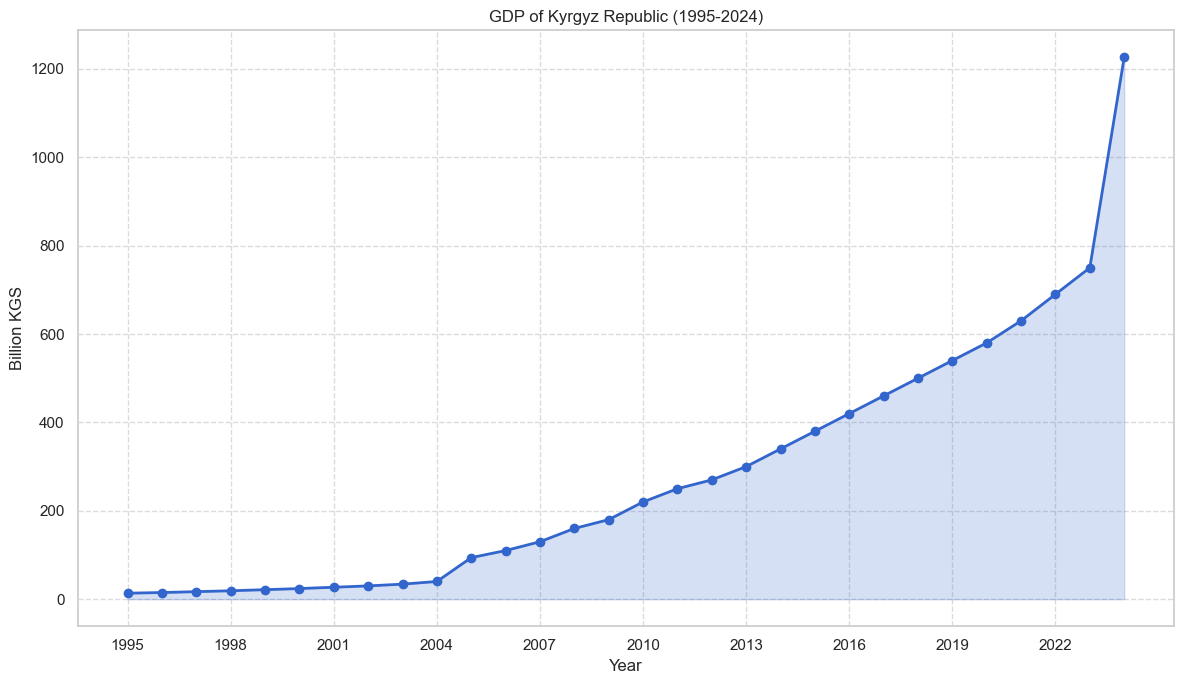

In [48]:
# Dispalying GDP
plt.figure(figsize=(12, 7))
plt.plot(df["Year"], df["GDP (billion KGS)"], marker='o', linewidth=2, color='#3366cc')
plt.title("GDP of Kyrgyz Republic (1995-2024)")
plt.xlabel("Year")
plt.ylabel("Billion KGS")
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(df["Year"], df["GDP (billion KGS)"], alpha=0.2, color='#3366cc')
plt.xticks(df["Year"][::3]) 
plt.tight_layout()
plt.show()

## Visualization

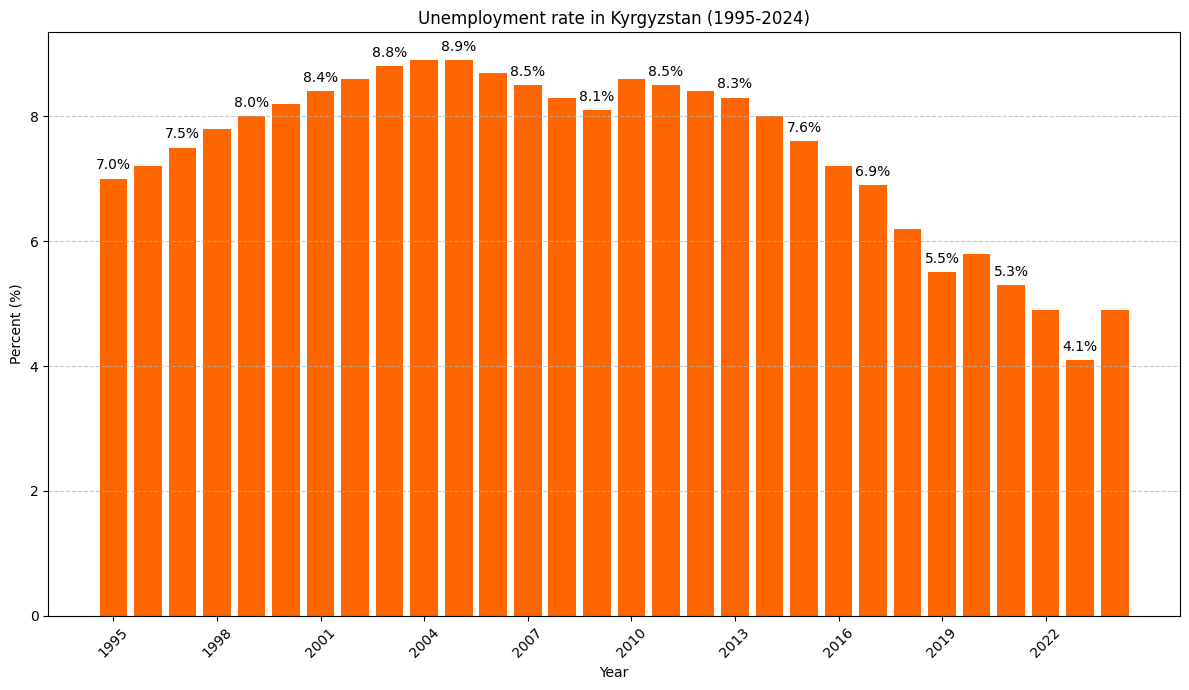

In [ ]:
# Unemployment rate
plt.figure(figsize=(12, 7))
bars = plt.bar(df["Year"], df["Unemployment Rate (%)"], color='#ff6600')
plt.title("Unemployment rate in Kyrgyzstan (1995-2024)")
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(df["Year"][::3], rotation=45)

for bar in bars:
    height = bar.get_height()
    if int(bar.get_x()) % 2 == 0: 
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

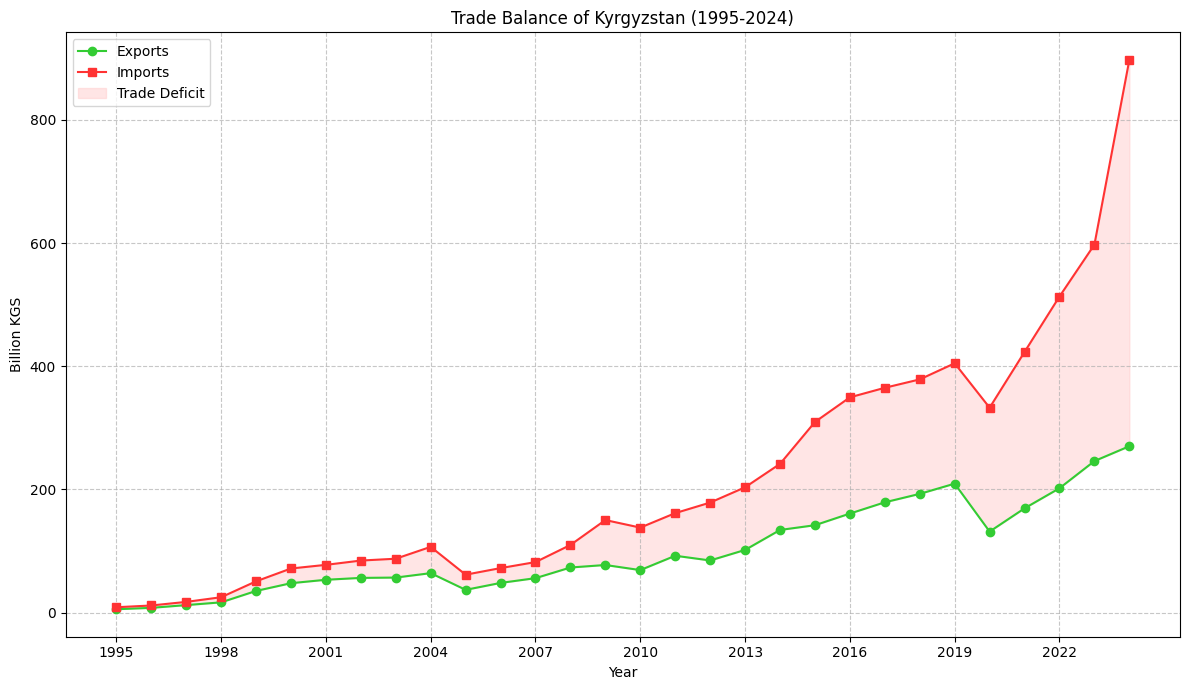

In [ ]:
# Trade balance
plt.figure(figsize=(12, 7))
plt.plot(df["Year"], df["Exports (billion KGS)"], marker='o', label="Exports", color='#33cc33')
plt.plot(df["Year"], df["Imports (billion KGS)"], marker='s', label="Imports", color='#ff3333')
plt.fill_between(df["Year"], df["Exports (billion KGS)"], df["Imports (billion KGS)"], 
                where=(df["Imports (billion KGS)"] > df["Exports (billion KGS)"]),
                color='#ffcccc', alpha=0.5, label="Trade Deficit")
plt.title("Trade Balance of Kyrgyzstan (1995-2024)")
plt.xlabel("Year")
plt.ylabel("Billion KGS")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df["Year"][::3])
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['Year', 'Population', 'GDP (billion KGS)', 'GDP Growth (%)',
       'Inflation (%)', 'Unemployment Rate (%)', 'Average Salary (KGS)',
       'Exports (billion $)', 'Imports (billion $)',
       'Government Debt (billion $)', 'USD to KGS', 'Exports (billion KGS)',
       'Imports (billion KGS)', 'Government Debt (billion KGS)',
       'GDP per Capita (KGS)', 'Trade Balance (billion KGS)',
       'GDP Growth Rate (%)'],
      dtype='object')

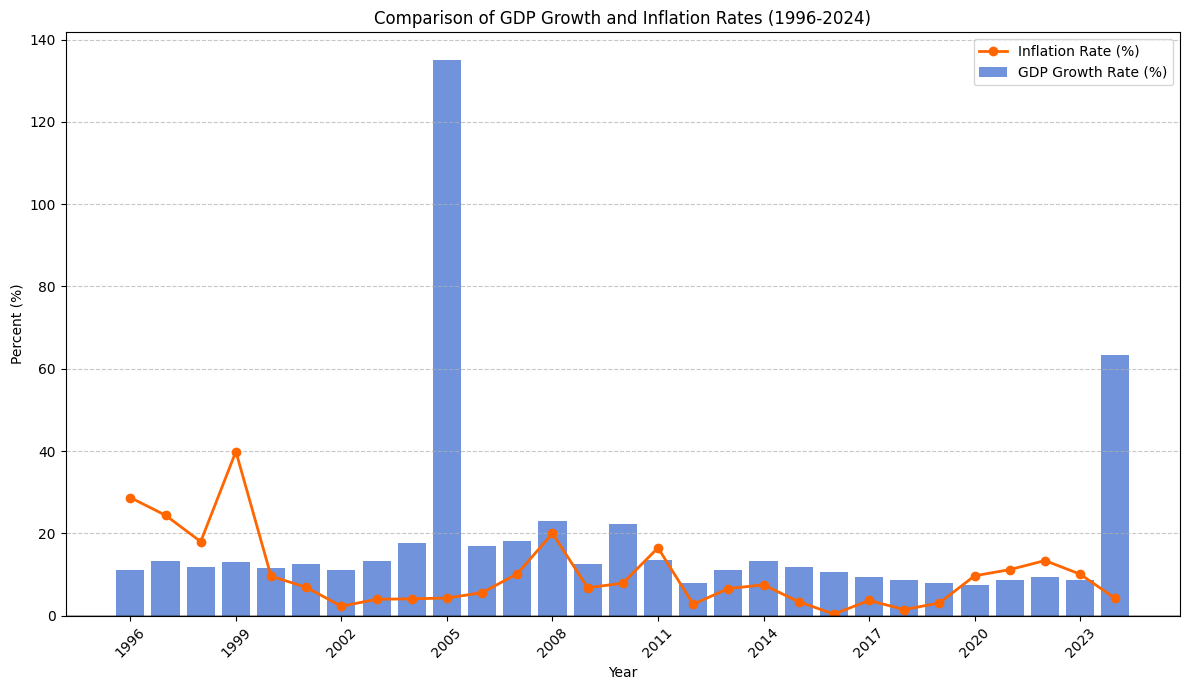

In [19]:
# Calculate GDP growth rate
df["GDP Growth Rate (%)"] = df["GDP (billion KGS)"].pct_change() * 100

plt.figure(figsize=(12, 7))
plt.bar(df["Year"][1:], df["GDP Growth Rate (%)"][1:], color='#3366cc', alpha=0.7, label="GDP Growth Rate (%)")
plt.plot(df["Year"][1:], df["Inflation (%)"][1:], color='#ff6600', linewidth=2, marker='o', label="Inflation Rate (%)")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title("Comparison of GDP Growth and Inflation Rates (1996-2024)")
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(df["Year"][1::3], rotation=45)
plt.tight_layout()
plt.show()

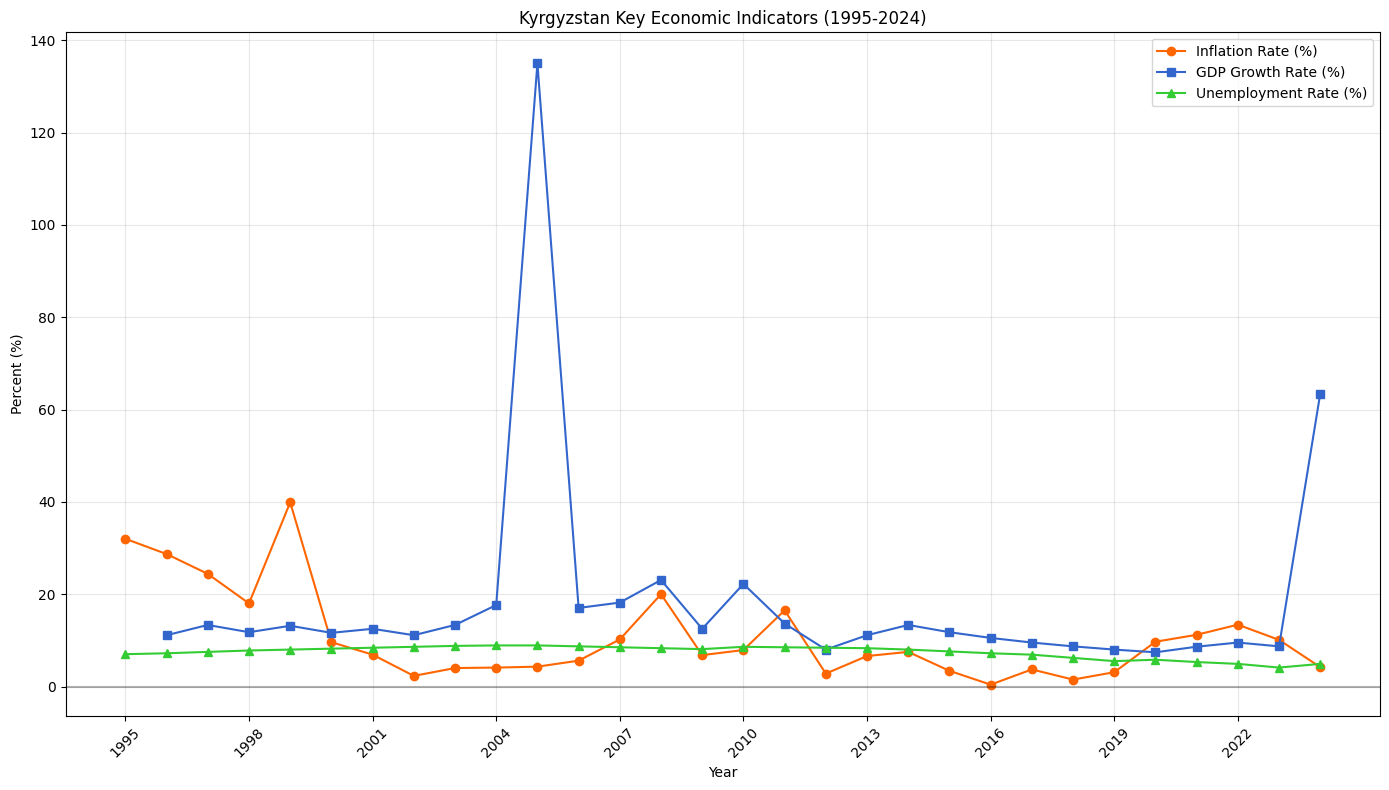

In [24]:
# Key economic indicators
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['Inflation (%)'], marker='o', linestyle='-', 
         label='Inflation Rate (%)', color='#ff6600')
plt.plot(df['Year'][1:], df['GDP Growth Rate (%)'][1:], marker='s', linestyle='-', 
         label='GDP Growth Rate (%)', color='#3366cc')
plt.plot(df['Year'], df['Unemployment Rate (%)'], marker='^', linestyle='-', 
         label='Unemployment Rate (%)', color='#33cc33')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Kyrgyzstan Key Economic Indicators (1995-2024)')
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df['Year'][::3], rotation=45)
plt.tight_layout()
plt.show()

## Distribution analysis

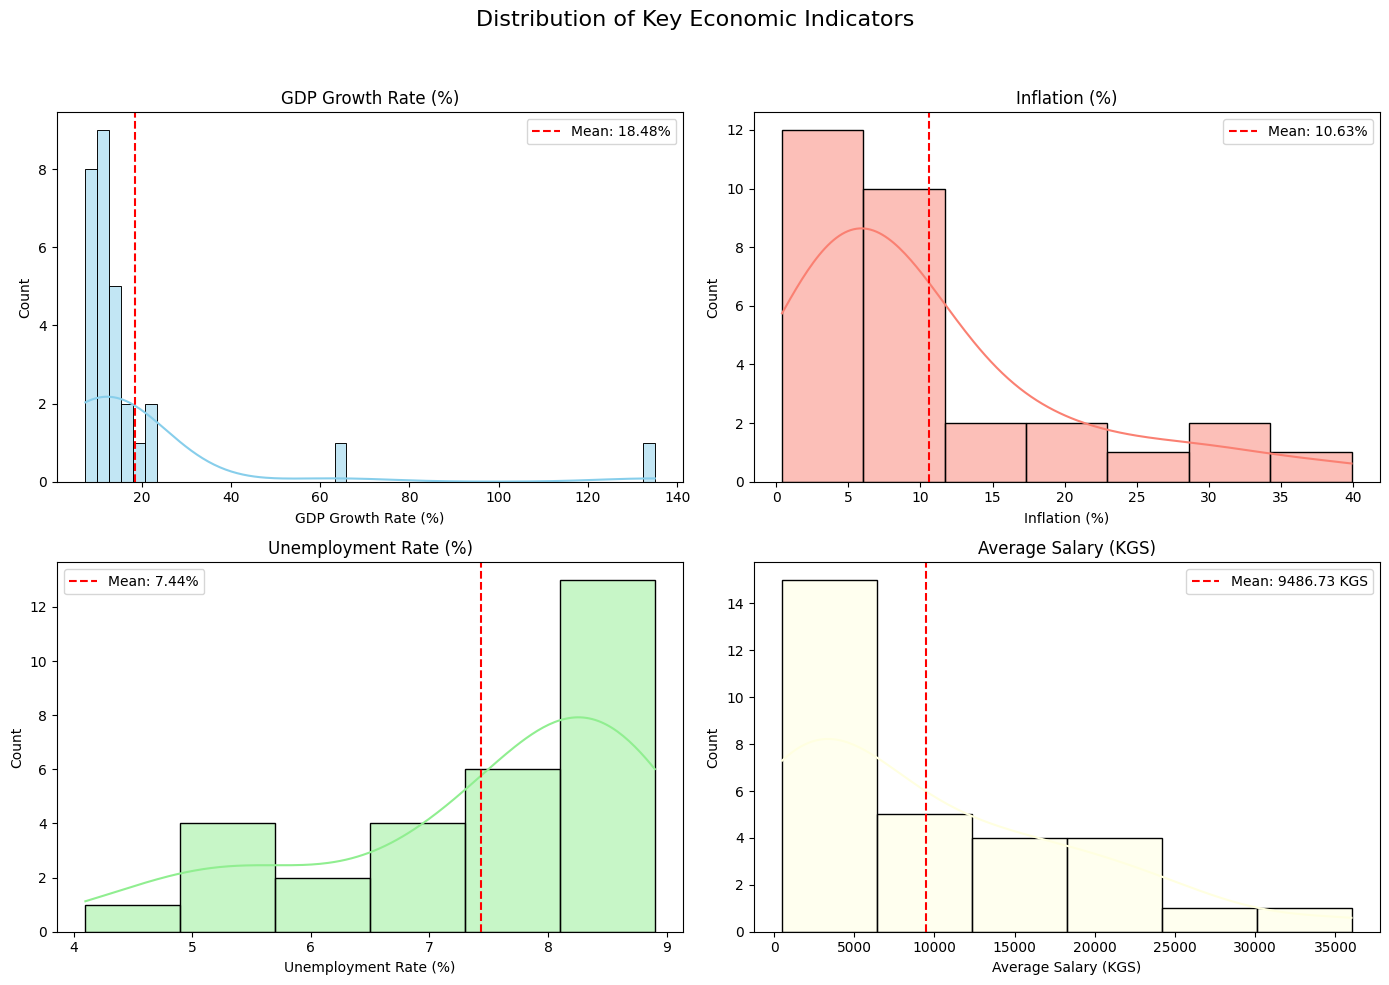

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Economic Indicators', fontsize=16)

# GDP Growth Rate
sns.histplot(df['GDP Growth Rate (%)'].dropna(), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].axvline(df['GDP Growth Rate (%)'].dropna().mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["GDP Growth Rate (%)"].dropna().mean():.2f}%')
axes[0, 0].set_title('GDP Growth Rate (%)')
axes[0, 0].legend()

# Inflation
sns.histplot(df['Inflation (%)'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].axvline(df['Inflation (%)'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["Inflation (%)"].mean():.2f}%')
axes[0, 1].set_title('Inflation (%)')
axes[0, 1].legend()

# Unemployment Rate
sns.histplot(df['Unemployment Rate (%)'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].axvline(df['Unemployment Rate (%)'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["Unemployment Rate (%)"].mean():.2f}%')
axes[1, 0].set_title('Unemployment Rate (%)')
axes[1, 0].legend()

# Average Salary
sns.histplot(df['Average Salary (KGS)'], kde=True, ax=axes[1, 1], color='lightyellow')
axes[1, 1].axvline(df['Average Salary (KGS)'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["Average Salary (KGS)"].mean():.2f} KGS')
axes[1, 1].set_title('Average Salary (KGS)')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Correlation analysis

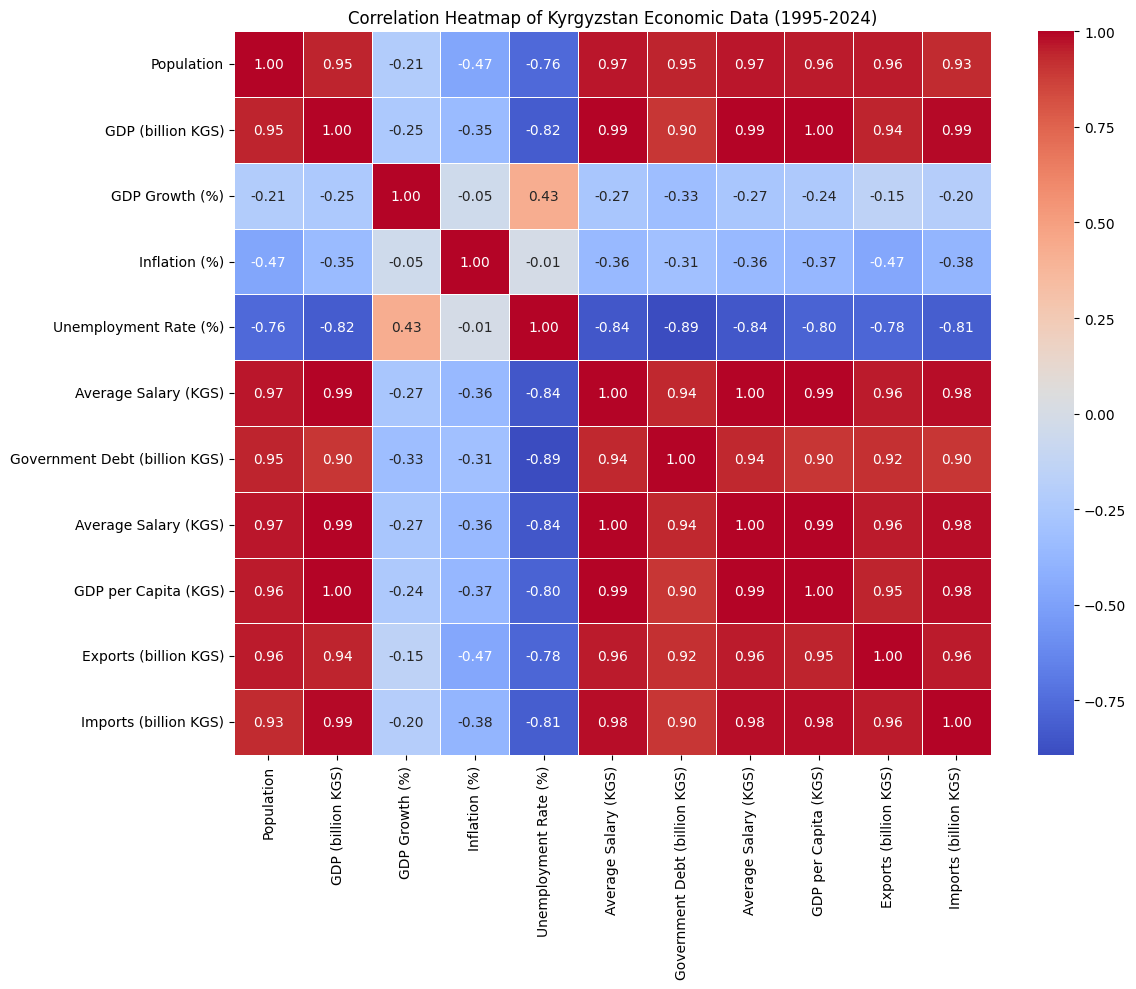

In [22]:
# Heatmap to see correaltions in data
numeric_cols = ['Population', 'GDP (billion KGS)', 'GDP Growth (%)', 
                'Inflation (%)', 'Unemployment Rate (%)', 'Average Salary (KGS)', 
                'Government Debt (billion KGS)', 'Average Salary (KGS)', 'GDP per Capita (KGS)', 'Exports (billion KGS)', 'Imports (billion KGS)']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Kyrgyzstan Economic Data (1995-2024)")
plt.tight_layout()
plt.show()